In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix


In [2]:
df = pd.read_csv('df_cleaned2.csv')
print("CSV loaded. Columns:", df.columns)

CSV loaded. Columns: Index(['Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
       'spotify_subscription_plan', 'premium_sub_willingness',
       'preffered_premium_plan', 'preferred_listening_content',
       'fav_music_genre', 'music_time_slot', 'music_Influencial_mood',
       'music_lis_frequency', 'music_expl_method', 'music_recc_rating',
       'pod_lis_frequency', 'fav_pod_genre', 'preffered_pod_format',
       'pod_host_preference', 'preffered_pod_duration',
       'pod_variety_satisfaction'],
      dtype='object')


In [8]:
df.head()

,Age,Gender,spotify_usage_period,spotify_listening_device,spotify_subscription_plan,premium_sub_willingness,preffered_premium_plan,preferred_listening_content,fav_music_genre,music_time_slot,music_Influencial_mood,music_lis_frequency,music_expl_method,music_recc_rating,pod_lis_frequency,fav_pod_genre,preffered_pod_format,pod_host_preference,preffered_pod_duration,pod_variety_satisfaction
0,20-35,Female,More than 2 years,Smart speakers or voice assistants,Free (ad-supported),Yes,Family Plan-Rs 179/month,Podcast,Melody,Night,Happy,leisure time,Playlists,3,Daily,Comedy,Interview,Both,Both,Ok
1,12-20,Male,More than 2 years,Computer or laptop,Free (ad-supported),Yes,Individual Plan- Rs 119/ month,Podcast,Rap,Afternoon,Happy,Workout session,Playlists,2,Several times a week,Comedy,Interview,Both,NaN,Satisfied
2,35-60,Male,6 months to 1 year,Smart speakers or voice assistants,Free (ad-supported),Yes,Student Plan-Rs 59/month,Podcast,Pop,Night,Happy,"Study Hours, While Traveling",Playlists,4,Once a week,Sports,Interview,NaN,Both,Satisfied
3,20-35,Male,1 year to 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Melody,Night,Happy,leisure time,"recommendations, Playlists",4,Rarely,Lifestyle and Health,Story telling,Well known individuals,Both,Ok
4,20-35,Male,More than 2 years,Smartphone,Free (ad-supported),No,NaN,Music,Pop,Night,Happy,Workout session,Others,3,Never,NaN,NaN,NaN,NaN,Ok


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Age                          437 non-null    object
 1   Gender                       437 non-null    object
 2   spotify_usage_period         437 non-null    object
 3   spotify_listening_device     437 non-null    object
 4   spotify_subscription_plan    437 non-null    object
 5   premium_sub_willingness      437 non-null    object
 6   preffered_premium_plan       254 non-null    object
 7   preferred_listening_content  437 non-null    object
 8   fav_music_genre              437 non-null    object
 9   music_time_slot              437 non-null    object
 10  music_Influencial_mood       437 non-null    object
 11  music_lis_frequency          437 non-null    object
 12  music_expl_method            437 non-null    object
 13  music_recc_rating            437 no

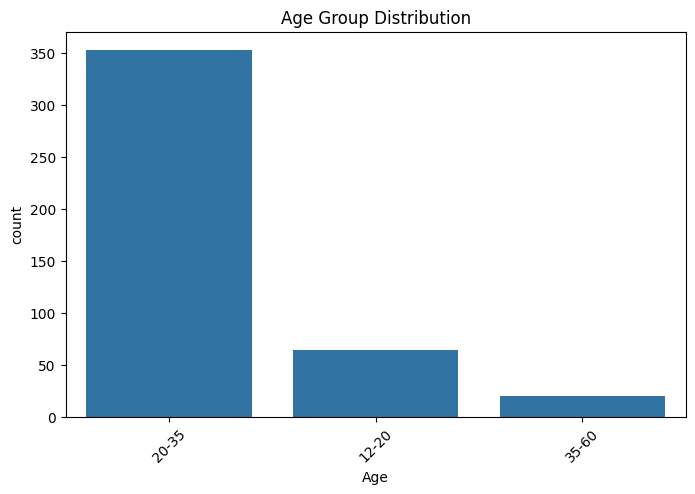

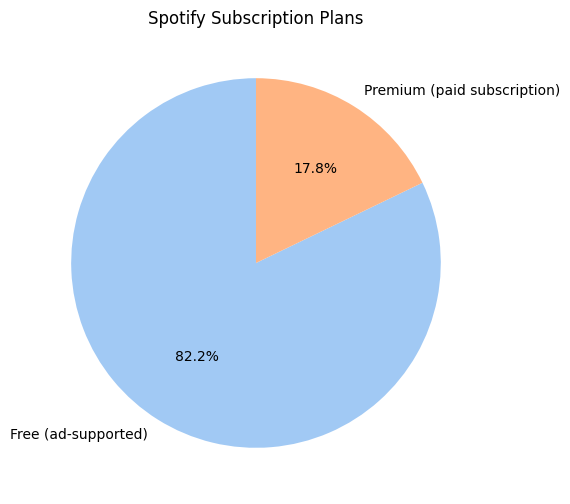

C:\Users\TUF\AppData\Local\Temp\ipykernel_40616\3898962664.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='spotify_listening_device', data=df, order=df['spotify_listening_device'].value_counts().index, palette='viridis')


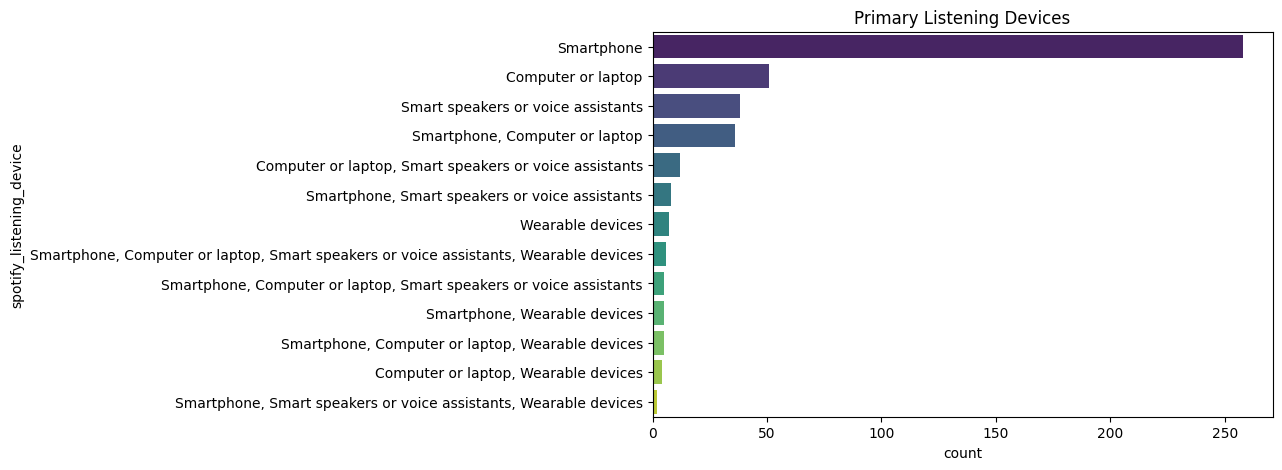

In [11]:
#Age Distribution
plt.figure(figsize=(8,5))
sns.countplot(x='Age', data=df, order=df['Age'].value_counts().index)
plt.title('Age Group Distribution')
plt.xticks(rotation=45)
plt.show()

# 2. Subscription Types
plt.figure(figsize=(6,6))
df['spotify_subscription_plan'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Spotify Subscription Plans')
plt.ylabel('')
plt.show()

# 3. Device Usage
plt.figure(figsize=(8,5))
sns.countplot(y='spotify_listening_device', data=df, order=df['spotify_listening_device'].value_counts().index, palette='viridis')
plt.title('Primary Listening Devices')
plt.show()

In [19]:
selected_columns = [
    'Age', 'Gender', 'spotify_usage_period', 'spotify_listening_device',
    'preffered_premium_plan', 'pod_lis_frequency', 'preffered_pod_format', 'fav_pod_genre'
]
df_model = df[selected_columns]
df_model = df_model[df_model['fav_pod_genre'].notna()]  # Remove rows with NaN in target

X = df_model.drop('fav_pod_genre', axis=1)
y = df_model['fav_pod_genre']
X_encoded = pd.get_dummies(X, drop_first=True)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

C:\Users\TUF\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Classification Report:
                       precision    recall  f1-score   support

              Comedy       0.48      0.52      0.50        23
    Food and cooking       0.00      0.00      0.00         3
  Health and Fitness       0.30      0.75      0.43         8
Lifestyle and Health       0.29      0.25      0.27        16
              Sports       0.33      0.08      0.12        13

            accuracy                           0.37        63
           macro avg       0.28      0.32      0.26        63
        weighted avg       0.35      0.37      0.33        63

Accuracy Score: 0.36507936507936506
Confusion Matrix:
 [[12  1  5  4  1]
 [ 0  0  1  1  1]
 [ 0  0  6  2  0]
 [10  0  2  4  0]
 [ 3  0  6  3  1]]


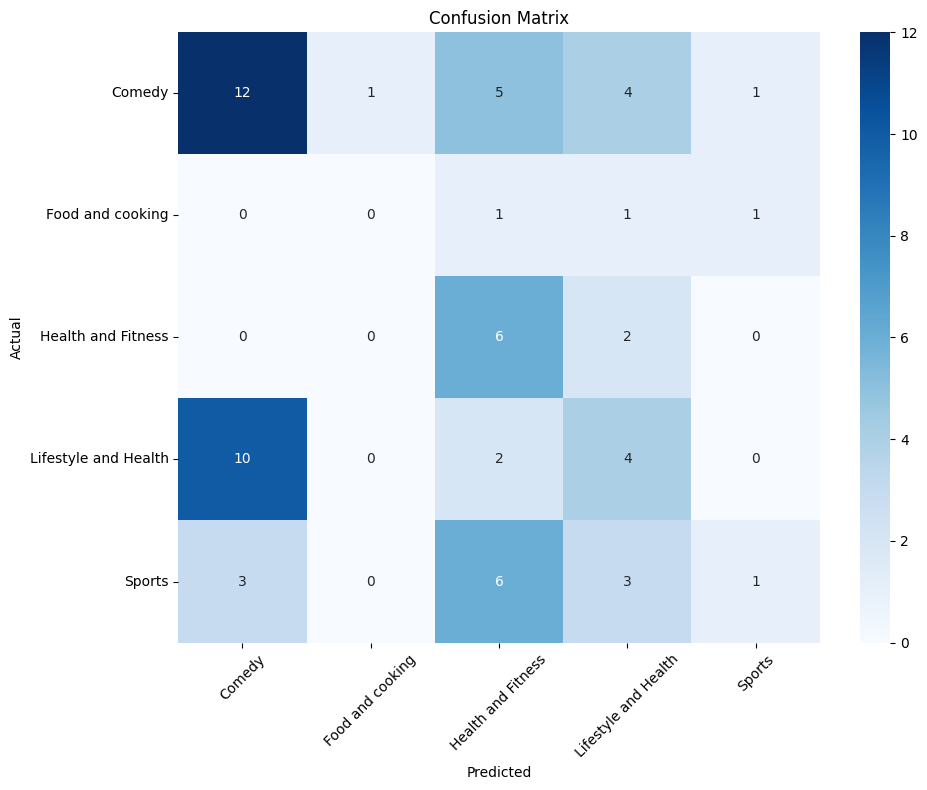

In [21]:
y_pred = model.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


C:\Users\TUF\AppData\Local\Temp\ipykernel_40616\2785777539.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y_pred, order=pd.Series(y_pred).value_counts().index, palette='magma')


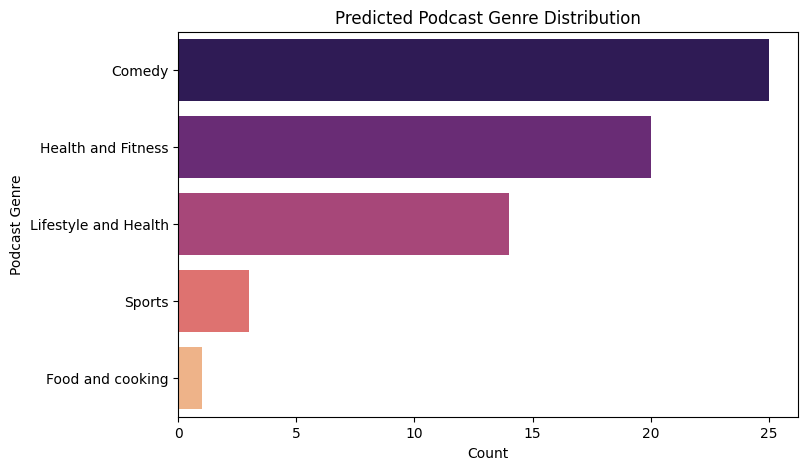

In [22]:
# Bar chart of predicted podcast genres
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.countplot(y=y_pred, order=pd.Series(y_pred).value_counts().index, palette='magma')
plt.title('Predicted Podcast Genre Distribution')
plt.xlabel('Count')
plt.ylabel('Podcast Genre')
plt.show()


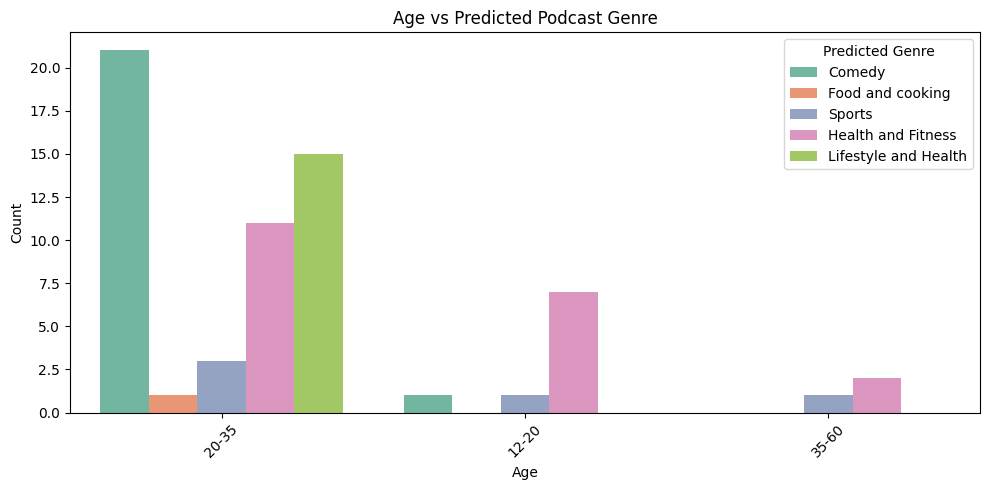

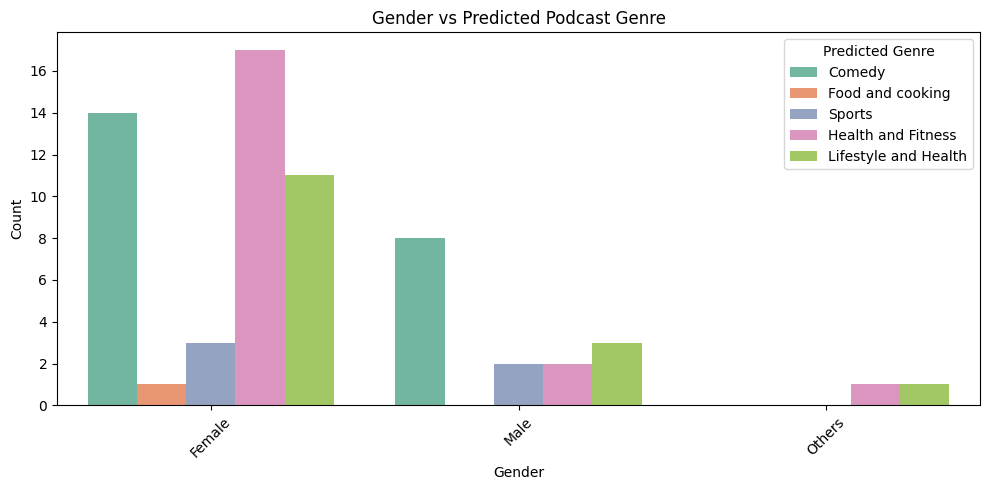

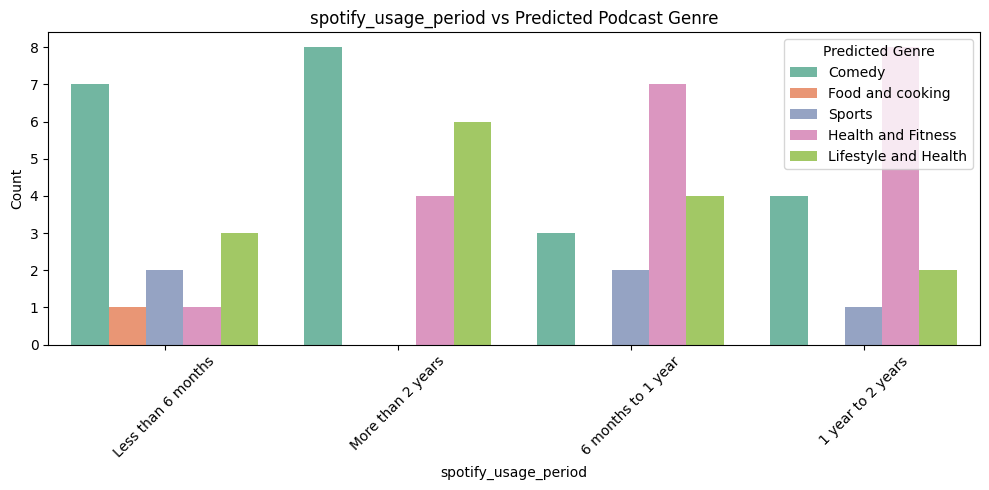

C:\Users\TUF\AppData\Local\Temp\ipykernel_26788\3910054285.py:30: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


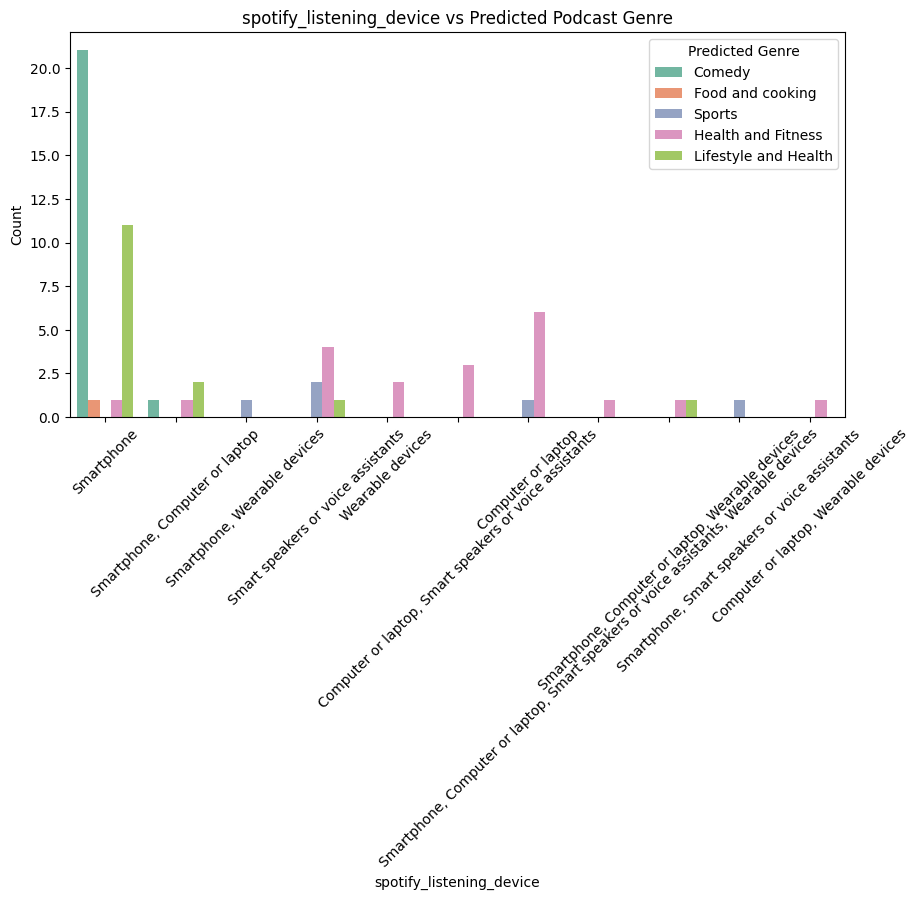

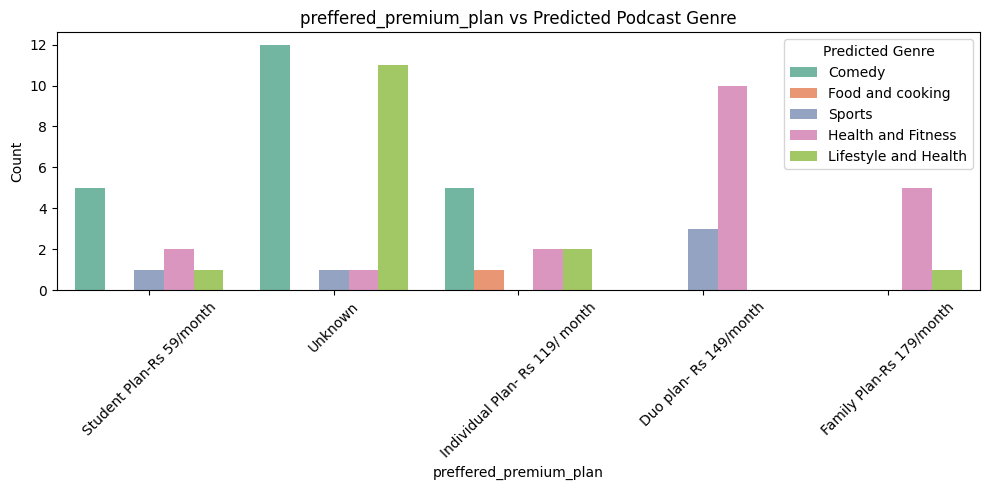

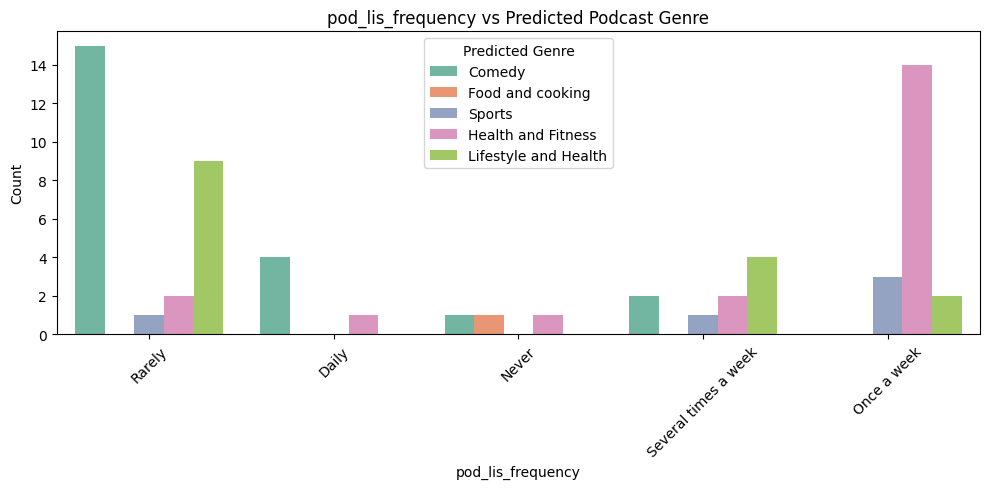

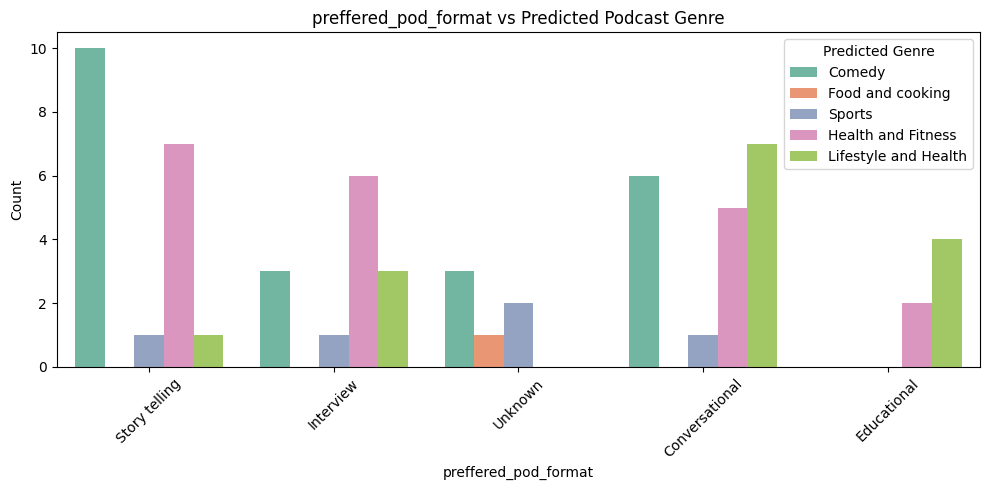

In [19]:
# Add predicted genre to test set
X_test_copy = X_test.copy()
X_test_copy['Predicted_Genre'] = y_pred

# Merge back with original (non-encoded) columns for readable labels
X_test_original = X.loc[X_test.index].copy()
X_test_original['Predicted_Genre'] = y_pred

# Features to visualize
features = [
    'Age',
    'Gender',
    'spotify_usage_period',
    'spotify_listening_device',
    'preffered_premium_plan',
    'pod_lis_frequency',
    'preffered_pod_format'
]

# Plot each feature against predicted podcast genre
for feature in features:
    if feature in X_test_original.columns:
        plt.figure(figsize=(10, 5))
        sns.countplot(data=X_test_original, x=feature, hue='Predicted_Genre', palette='Set2')
        plt.title(f'{feature} vs Predicted Podcast Genre')
        plt.xticks(rotation=45)
        plt.xlabel(feature)
        plt.ylabel('Count')
        plt.legend(title='Predicted Genre')
        plt.tight_layout()
        plt.show()
